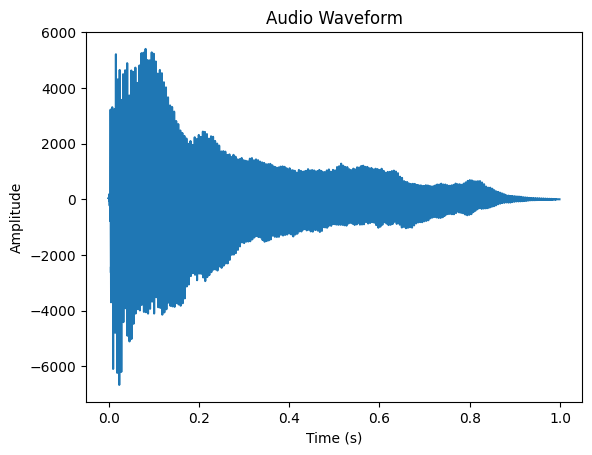

In [38]:
import wave
import matplotlib.pyplot as plt
import numpy as np

# Specify the path to the WAV file
file_path = "sons_multipitch\A3A4_piano.wav"

# Open the WAV file
with wave.open(file_path, 'rb') as wav_file:
    # Get the audio data
    audio_data = wav_file.readframes(-1)
    audio_data = np.frombuffer(audio_data, dtype=np.int16)

    # Get the sample rate (number of samples per second)
    sample_rate = wav_file.getframerate()

# Create the time axis for plotting
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the audio waveform
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()


In [29]:
from IPython.display import Audio

# Play the audio
Audio(audio_data, rate=sample_rate)


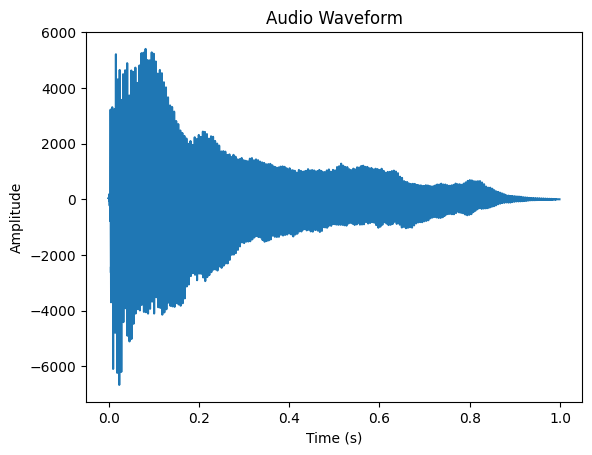

In [30]:
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.savefig('audio_waveform.png')


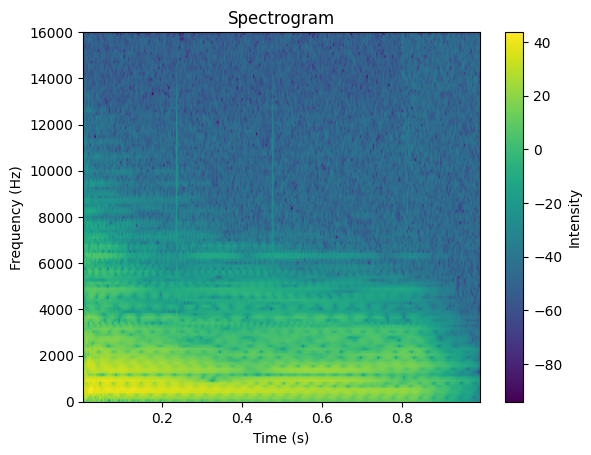

In [31]:
plt.specgram(audio_data, Fs=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(label='Intensity')
plt.show()


c:\Users\matte\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(


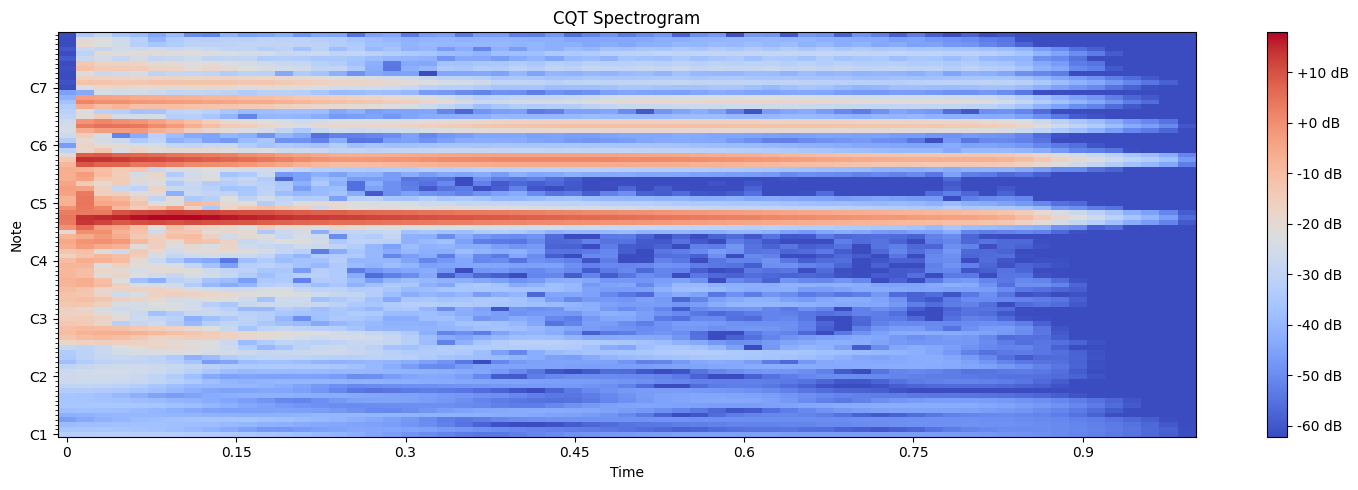

In [26]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Convert audio_data to floating point if it's not already
if not np.issubdtype(audio_data.dtype, np.floating):
    # Assuming audio_data is 16-bit integer, convert to float
    audio_data = audio_data.astype(np.float32) / np.max(np.abs(audio_data))

# Compute the CQT
C = librosa.cqt(audio_data, sr=sample_rate)

# Convert to decibel scale
C_db = librosa.amplitude_to_db(np.abs(C))

# Plot the CQT spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(C_db, sr=sample_rate, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('CQT Spectrogram')
plt.tight_layout()
plt.show()


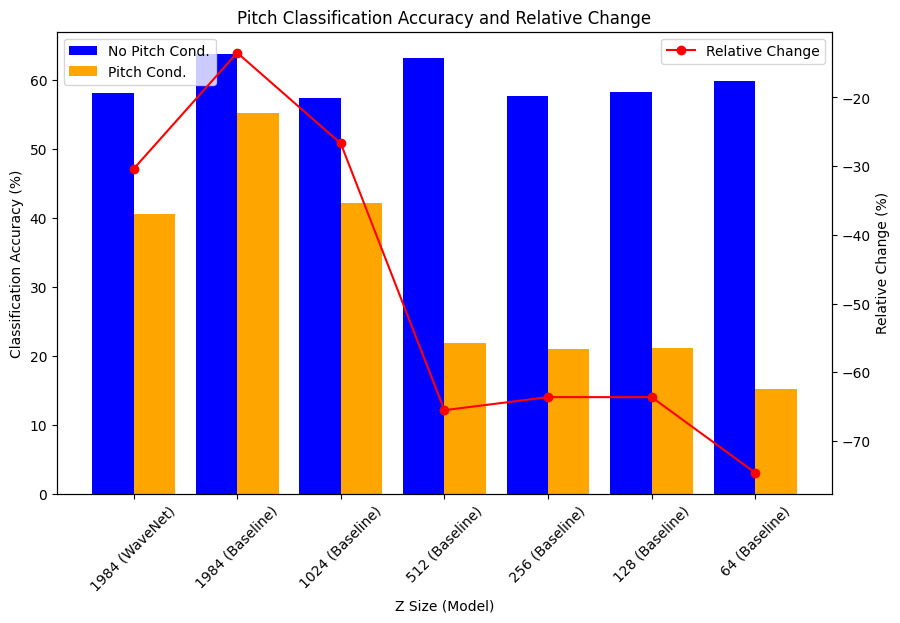

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Extracted data from the table image
models = ['WaveNet', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline']
z_sizes = [1984, 1984, 1024, 512, 256, 128, 64]
no_pitch_cond = [58.1, 63.8, 57.4, 63.2, 57.7, 58.2, 59.8]
pitch_cond = [40.5, 55.2, 42.1, 21.8, 21.0, 21.2, 15.2]
relative_change = [-30.4, -13.5, -26.7, -65.5, -63.6, -63.6, -74.6]

# Create a dataframe for better handling
df = pd.DataFrame({
    'Model': models,
    'Z Size': z_sizes,
    'No Pitch Cond.': no_pitch_cond,
    'Pitch Cond.': pitch_cond,
    'Relative Change': relative_change
})

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the 'No Pitch Cond.' and 'Pitch Cond.' accuracies
ax1.bar(df.index - 0.2, df['No Pitch Cond.'], width=0.4, label='No Pitch Cond.', color='blue')
ax1.bar(df.index + 0.2, df['Pitch Cond.'], width=0.4, label='Pitch Cond.', color='orange')
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Z Size'].astype(str) + " (" + df['Model'] + ")", rotation=45)
ax1.set_xlabel('Z Size (Model)')
ax1.set_ylabel('Classification Accuracy (%)')
ax1.legend(loc='upper left')

# Plot the 'Relative Change' on the second y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['Relative Change'], label='Relative Change', color='red', marker='o')
ax2.set_ylabel('Relative Change (%)')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Pitch Classification Accuracy and Relative Change')
plt.show()


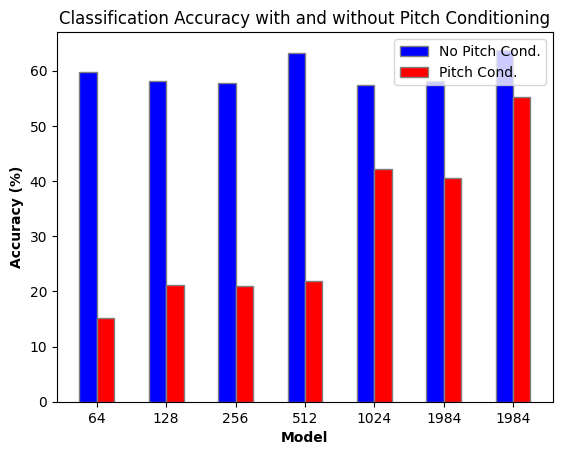

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
data = {
    'Model': ['WaveNet', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline'],
    'Z Size': [1984, 1984, 1024, 512, 256, 128, 64],
    'No Pitch Cond': [58.1, 63.8, 57.4, 63.2, 57.7, 58.2, 59.8],
    'Pitch Cond': [40.5, 55.2, 42.1, 21.8, 21.0, 21.2, 15.2],
    'Relative Change': [-30.4, -13.5, -26.7, -65.5, -63.6, -63.6, -74.6]
}

# Create a dataframe
df = pd.DataFrame(data)

# Sort dataframe by Z Size
df_sorted = df.sort_values('Z Size')

# Plot
fig, ax = plt.subplots()

# Set position of bar on X axis
r1 = np.arange(len(df_sorted))
r2 = [x + 0.25 for x in r1]

# Make the plot
ax.bar(r1, df_sorted['No Pitch Cond'], color='b', width=0.25, edgecolor='grey', label='No Pitch Cond.')
ax.bar(r2, df_sorted['Pitch Cond'], color='r', width=0.25, edgecolor='grey', label='Pitch Cond.')

# Add labels
ax.set_xlabel('Model', fontweight='bold')
ax.set_xticks([r + 0.125 for r in range(len(r1))])
ax.set_xticklabels(df_sorted['Z Size'])
ax.set_ylabel('Accuracy (%)', fontweight='bold')
ax.set_title('Classification Accuracy with and without Pitch Conditioning')

# Create legend & Show graphic
ax.legend()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_11636\3086904861.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_spec, ref=np.max), sr=sample_rate, x_axis='time', y_axis='cqt_note')


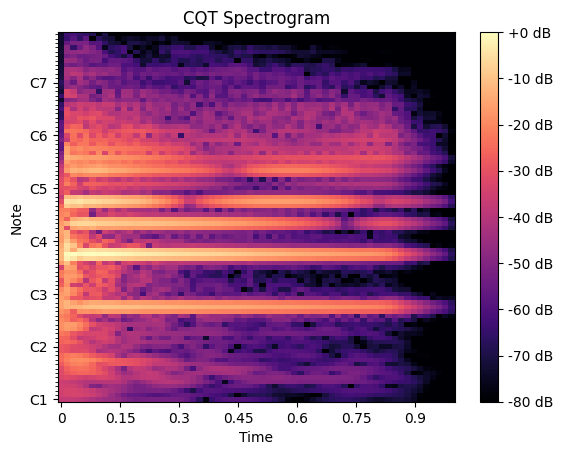

In [40]:
# Compute the CQT spectrogram
cqt_spec = librosa.cqt(audio_data.astype(float), sr=16000)

# Display the CQT spectrogram
librosa.display.specshow(librosa.amplitude_to_db(cqt_spec, ref=np.max), sr=sample_rate, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('CQT Spectrogram')
plt.show()


In [41]:
print(sample_rate)

32000


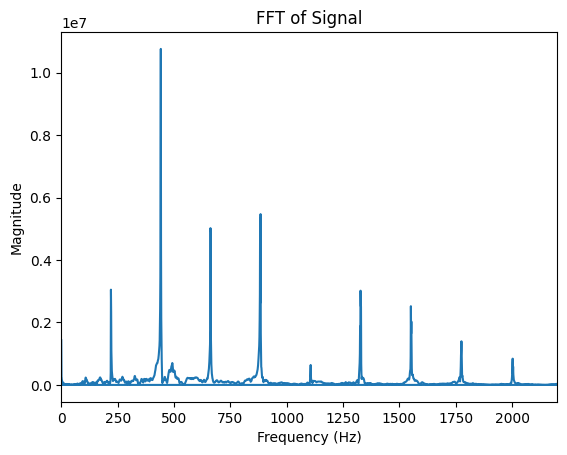

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the audio data
fft_data = np.fft.fft(audio_data)

# Compute the frequency axis
freq = np.fft.fftfreq(len(audio_data), 1/sample_rate)

# Plot the FFT
plt.plot(freq, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Signal')
# add a limit on the x axis
plt.xlim([0, 2200])
plt.show()


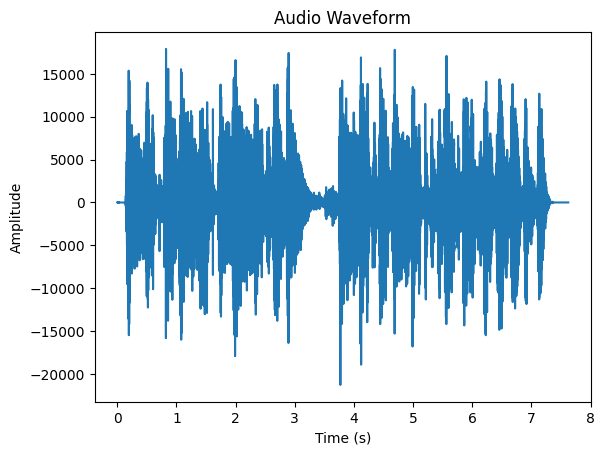

In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np

# Specify the path to the WAV file
file_path = "guitare.wav"

# Open the WAV file
with wave.open(file_path, 'rb') as wav_file:
    # Get the audio data
    audio_data = wav_file.readframes(-1)
    audio_data = np.frombuffer(audio_data, dtype=np.int16)

    # Get the sample rate (number of samples per second)
    sample_rate = wav_file.getframerate()

# Create the time axis for plotting
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the audio waveform
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()


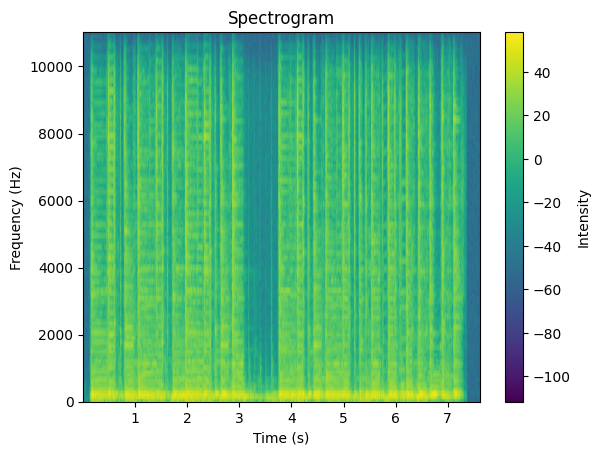

In [2]:
plt.specgram(audio_data, Fs=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(label='Intensity')
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_11636\1463754508.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_spec, ref=np.max), sr=sample_rate, x_axis='time', y_axis='cqt_note')


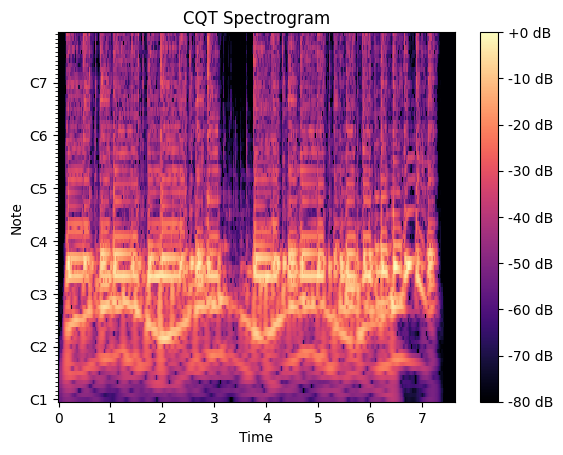

In [5]:
# Compute the CQT spectrogram
cqt_spec = librosa.cqt(audio_data.astype(float), sr=sample_rate)

# Display the CQT spectrogram
librosa.display.specshow(librosa.amplitude_to_db(cqt_spec, ref=np.max), sr=sample_rate, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('CQT Spectrogram')
plt.show()


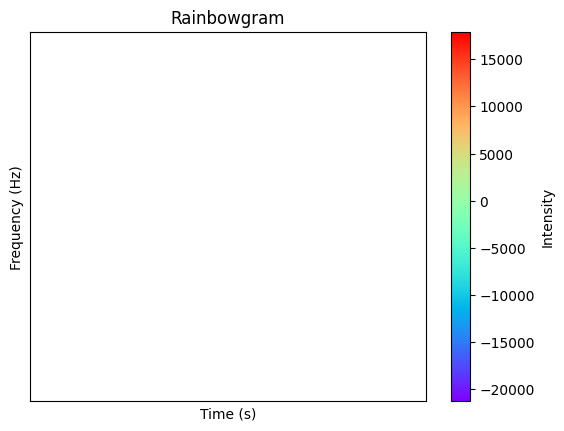

In [8]:
# Reshape audio_data to have two dimensions
audio_data_reshaped = audio_data.reshape(1, -1)

# Plot the rainbowgram of audio_data
librosa.display.specshow(audio_data_reshaped, sr=sample_rate, cmap='rainbow')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Rainbowgram')
plt.colorbar(label='Intensity')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot the rainbowgram of audio_data
plt.specgram(audio_data, Fs=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Rainbowgram')
plt.colorbar(label='Intensity')

# Save the plot as an image file
plt.savefig('rainbowgram.png')
